In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline


# 1943 MCP 뉴런

In [3]:
x = np.array([0.1, 0.2])

In [4]:
w = np.array([0.3, 0.4])

In [5]:
z = np.dot(x, w)
z

0.11000000000000001

In [6]:
b = 0.3

In [10]:
y = 1 if z > b else -1
y = 3 if z > b else -1

In [11]:
y

-1

In [12]:
def test(logic):
    for x1, x2 in [(0, 0), (0, 1), (1, 0), (1, 1)]:
        y = logic(x1, x2)
        print(x1, x2, '|', y)

In [13]:
def make_neuron(w, b):
    def neuron(*x):
        x = np.array(x)
        z = np.dot(x, w) + b
        y = 1 if z > 0 else 0
        return y
    return neuron

In [14]:
AND = make_neuron(w=np.array([0.5, 0.5]), b=-0.7)

In [15]:
test(AND)

0 0 | 0
0 1 | 0
1 0 | 0
1 1 | 1


In [16]:
NAND = make_neuron(w=np.array([-0.5, -0.5]), b=0.7)

In [17]:
test(NAND)

0 0 | 1
0 1 | 1
1 0 | 1
1 1 | 0


In [18]:
OR = make_neuron(w=np.array([0.5, 0.5]), b=-0.2)

In [19]:
test(OR)

0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 1


In [278]:
# %load perceptron.py
import numpy as np

class Perceptron:
    def __init__(self, 학습횟수=10, 학습률=0.1):
        self.epochs = 학습횟수
        self.learning_rate = 학습률
        
    def activation(self, z):
        return np.where(z > 0, 1, -1)
        
    def predict(self, x):
        z = np.dot(x, self.w) + self.b
        return self.activation(z)
        
    def 학습(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.b = 0.
        
        error_history = []
        
        w_t = np.zeros(X.shape[1])
        b_t = 0
        
        for i in range(self.epochs):
            # 각 샘플에 대해
            sum_square_error = 0
            for xi, yi in zip(X, y):                
                y_pred = self.predict(xi)
                error = yi - y_pred
                
                sum_square_error += error**2
                # 가중치 갱신
                update = self.learning_rate * error
                self.w += update * xi
                self.b += update
                
                w_t = self.w
                b_t = self.b
                
                print('w_t:{}, b_t:{}'.format(w_t, b_t))
                
            error_history.append(sum_square_error)
            print('[훈련 {}] Error: {}, w_t:{}, b_t:{}'.format(
                i, sum_square_error, w_t, b_t))
        return error_history

In [279]:
perceptron = Perceptron()

In [260]:
iris = pd.read_csv('data/iris.data', header=None)

In [261]:
data = iris[:100]

In [262]:
data[4].value_counts()

Iris-versicolor    50
Iris-setosa        50
Name: 4, dtype: int64

#### 연습

X, y를 적절하게 처리해서 Perceptron 모델을 훈련합니다.

In [263]:
#pd.get_dummies(data[4])

In [264]:
y = data[4]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: 4, dtype: object

In [265]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [266]:
y = y.replace(np.unique(y), [1, -1])

In [267]:
y.value_counts()

 1    50
-1    50
Name: 4, dtype: int64

In [268]:
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [269]:
X = data.values[:, 0:4].astype('float32')

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [272]:
y_test.size


25

In [280]:
perceptron = Perceptron(학습횟수=10, 학습률=0.1)
error_history = perceptron.학습(X_train, y_train)

w_t:[0.98000002 0.62       0.30000001 0.02      ], b_t:0.2
w_t:[0.98000002 0.62       0.30000001 0.02      ], b_t:0.2
w_t:[0.98000002 0.62       0.30000001 0.02      ], b_t:0.2
w_t:[0.98000002 0.62       0.30000001 0.02      ], b_t:0.2
w_t:[0.98000002 0.62       0.30000001 0.02      ], b_t:0.2
w_t:[ 0.          0.13999999 -0.36000001 -0.18      ], b_t:0.0
w_t:[ 0.          0.13999999 -0.36000001 -0.18      ], b_t:0.0
w_t:[ 1.          0.83999997 -0.10000002 -0.12      ], b_t:0.2
w_t:[ 1.          0.83999997 -0.10000002 -0.12      ], b_t:0.2
w_t:[ 1.          0.83999997 -0.10000002 -0.12      ], b_t:0.2
w_t:[-0.13999999  0.25999993 -0.94       -0.37999999], b_t:0.0
w_t:[-0.13999999  0.25999993 -0.94       -0.37999999], b_t:0.0
w_t:[ 0.88        1.01999992 -0.56       -0.29999998], b_t:0.2
w_t:[-0.36000001  0.43999988 -1.42000008 -0.55999997], b_t:0.0
w_t:[-0.36000001  0.43999988 -1.42000008 -0.55999997], b_t:0.0
w_t:[ 0.65999997  1.11999989 -1.12000006 -0.51999997], b_t:0.2
w_t:[-0.4400

w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], 

In [216]:
t = data.tail()
t


,0,1,2,3,4
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [128]:
y_train.head()


85     1
94     1
106   -1
108   -1
129   -1
Name: 4, dtype: int64

In [174]:
perceptron.b, perceptron.w

(0.2, array([ 0.20000011,  0.78      , -1.22000004, -0.52      ]))

In [184]:
test_param = [[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]]
perceptron.predict(test_param)

array([1, 1, 1, 1])

In [218]:
perceptron2 = Perceptron()
perceptron2.b = 0.2
perceptron2.w = [ 0.20000011,  0.78      , -1.22000004, -0.52      ]

test_param2 = [5.7, 3.0,4.2,1.2]

perceptron2.predict(test_param2)

array(-1)

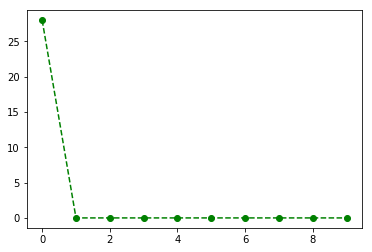

In [74]:
Series(error_history).plot(style='go--')

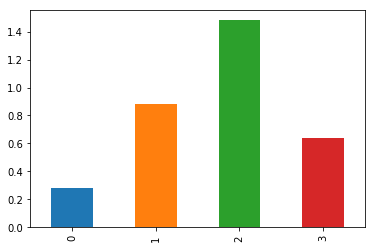

In [75]:
Series(np.abs(perceptron.w)).plot(kind='bar')

In [219]:
perceptron.b

0.2

In [220]:
data = iris[50:]

In [221]:
data[4].value_counts()

Iris-versicolor    50
Iris-virginica     50
Name: 4, dtype: int64

In [222]:
y = data[4]
y.head()

50    Iris-versicolor
51    Iris-versicolor
52    Iris-versicolor
53    Iris-versicolor
54    Iris-versicolor
Name: 4, dtype: object

In [223]:
y = y.replace(np.unique(y), [1, -1])
y.head()

50    1
51    1
52    1
53    1
54    1
Name: 4, dtype: int64

In [224]:
y.value_counts()

 1    50
-1    50
Name: 4, dtype: int64

In [225]:
X = data.values[:, 0:4].astype('float32')

In [226]:
X.shape

(100, 4)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [274]:
perceptron = Perceptron(학습횟수=30, 학습률=0.1)
error_history = perceptron.학습(X_train, y_train)

[훈련 0] Error: 44, w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
[훈련 1] Error: 0, w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
[훈련 2] Error: 0, w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
[훈련 3] Error: 0, w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
[훈련 4] Error: 0, w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
[훈련 5] Error: 0, w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
[훈련 6] Error: 0, w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
[훈련 7] Error: 0, w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
[훈련 8] Error: 0, w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
[훈련 9] Error: 0, w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
[훈련 10] Error: 0, w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
[훈련 11] Error: 0, w_t:[ 0.31999993  1.51999989 -2.18000013 -0.93999995], b_t:0.2
[훈련 12] Error: 0, w_t:[ 0.31999993  1

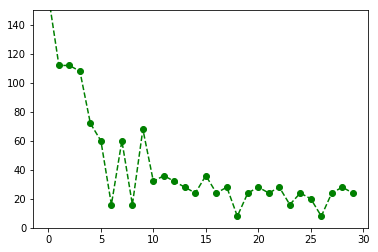

In [229]:
Series(error_history).plot(ylim=(0, 150), style='go--')

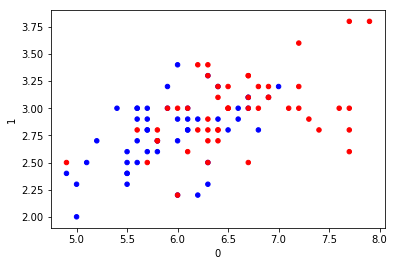

In [230]:
c = y.replace(np.unique(y), ['r', 'b'])
DataFrame(data).plot(kind='scatter', x=0, y=1, c=c)

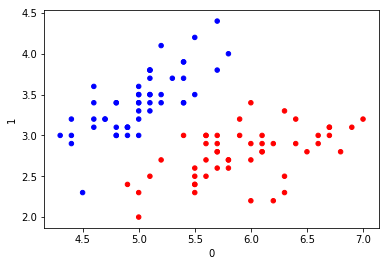

In [231]:
c = y.replace(np.unique(y), ['r', 'b'])
DataFrame(iris[:100]).plot(kind='scatter', x=0, y=1, c=c)

In [232]:
from sklearn.linear_model import LogisticRegression

In [233]:
logreg = LogisticRegression()

In [281]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [282]:
logreg.score(X_test, y_test)

1.0

In [283]:
y = iris[4]

In [284]:
y.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: 4, dtype: int64

In [285]:
X = iris.values[:, 0:4].astype('float32')

In [286]:
X.shape

(150, 4)

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [288]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [289]:
w = logreg.coef_
b = logreg.intercept_

In [294]:
type(b)

numpy.ndarray

In [295]:
w.shape

(3, 4)

In [307]:
b

array([ 0.25663276,  0.55029192, -0.89435854])

In [308]:
logreg.score(X_test, y_test)

0.5789473684210527

In [309]:
y_pred = logreg.predict(X_test)

In [310]:
y_pred_proba = logreg.predict_proba(X_test)

In [311]:
DataFrame(y_pred_proba)

,0,1,2
0,0.530587,0.469357,0.000056
1,0.000589,0.548532,0.450879
2,0.084449,0.845023,0.070528
3,0.135123,0.796834,0.068043
4,0.540761,0.459132,0.000107
5,0.551680,0.448288,0.000032
6,0.002998,0.593692,0.403309
7,0.001190,0.507114,0.491696
8,0.066917,0.832079,0.101004
9,0.002135,0.652787,0.345077


In [312]:
wine = pd.read_csv('data/wine.data')

FileNotFoundError: File b'data/wine.data' does not exist

In [134]:
wine[:5]

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavnoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [135]:
wine.shape

(178, 14)

In [137]:
y = wine['Class label']

In [138]:
y.value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [139]:
X = wine.values[:, 1:].astype('float32')

In [140]:
X.shape

(178, 13)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

하이퍼 파라메터 튜닝과 모델 표현력

In [141]:
logreg = LogisticRegression(C=1.0)

In [143]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
logreg.score(X_test, y_test)

0.9555555555555556

In [145]:
C_range = [0.001, 0.01, 0.1, 1., 10., 100., 1000.]

In [154]:
results = []
weights = []
for C in C_range:
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    weights.append(model.coef_)
    results.append((train_score, test_score))

In [152]:
results = DataFrame(results, columns=['train', 'test'])
results.index = C_range
results

,train,test
0.001,0.736842,0.822222
0.010,0.917293,0.933333
0.100,0.977444,0.955556
1.000,0.977444,0.955556
10.000,0.984962,0.933333
100.000,0.992481,0.911111
1000.000,1.000000,0.911111


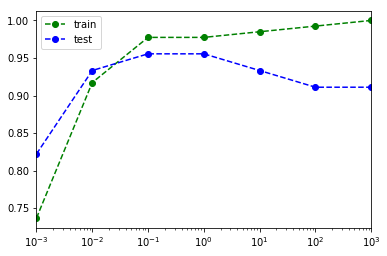

In [153]:
results.plot(logx=True, style=['go--', 'bo--'])

C의 크기에 따른 가중치의 양상

In [159]:
import matplotlib.pyplot as plt

In [168]:
weights[0].shape[1]

13

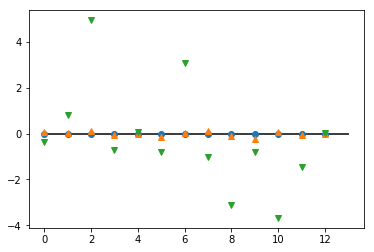

In [170]:
plt.plot(weights[0].mean(axis=0), 'o')
plt.plot(weights[3].mean(axis=0), '^')
plt.plot(weights[-1].mean(axis=0), 'v')
# 보조선
plt.hlines(0, 0, weights[0].shape[1])

In [171]:
from sklearn.preprocessing import StandardScaler

In [172]:
scaler = StandardScaler()

In [173]:
Xstd = scaler.fit_transform(X)

In [175]:
DataFrame(Xstd, columns=wine.columns[1:])

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavnoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518611,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246288,-0.499414,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406050,1.113450,0.965242
2,0.196878,0.021231,1.109335,-0.268738,0.088359,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788588,1.395148
3,1.691548,-0.346811,0.487926,-0.809251,0.930919,2.491445,1.466525,-0.981876,1.032155,1.186068,-0.427544,1.184072,2.334574
4,0.295699,0.227693,1.840402,0.451946,1.281985,0.808997,0.663352,0.226795,0.401405,-0.319275,0.362177,0.449601,-0.037874
5,1.481553,-0.517367,0.305160,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406050,0.336606,2.239039
6,1.716254,-0.418624,0.305160,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274430,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745443
8,2.259770,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061563,-0.885409,-0.352802,-1.049479,-0.122281,1.097417,1.125176,-1.143032,0.453967,0.935177,0.230557,1.325316,0.949319


In [176]:
X_train, X_test, Xstd_train, Xstd_test, y_train, y_test = train_test_split(
    X, Xstd, y)

In [178]:
results = []

for C in C_range:
    model = LogisticRegression(C=C)
    
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)    
    
    model.fit(Xstd_train, y_train)
    train_std_score = model.score(Xstd_train, y_train)
    test_std_score = model.score(Xstd_test, y_test)
    
    results.append((
        train_score, test_score, 
        train_std_score, test_std_score))    

In [181]:
results = DataFrame(
    results, columns=['train', 'test', 'train_std', 'test_std'])
results.index = C_range

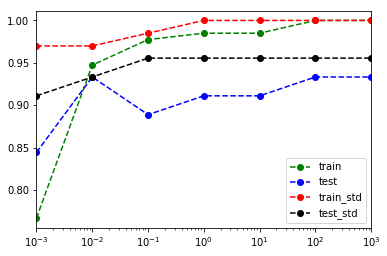

In [183]:
results.plot(logx=True, style=['go--', 'bo--', 'ro--', 'ko--'])